![example](images/director_shot.jpeg)

# Project 1: Movie Analysis

**Authors:**  Alex Liang
***

## Overview


The Project is the provide business insigts about the recent trends in movie industry to the business stakeholder so that they could enter this new entertainment markert. 

The project has utilized public data to analyze movies. Based upon the findings about movie rating and gross revenues etc, recommendatios are given to the stakerholder


## Business Problem

Microsoft sees the opportunity of creating original video content and they want to get in the new market. They have decided to create a new movie studio. The current business pain point is that they don't have much information about this new field and do not know what movies to create 

Out task is to  provide insights about what types of films are currently doing the best

Some Business insights to address:
* What types of movie contents are created the most(quantity) ?
* What types of movies have the highest ratings ?
* What types of movies have the best box office gross ?  


We will explore the data to find out what types of movies are outstandings in the follow areas:
* Popularity of Movie (quantity)
* Movie ratings
* Box office revenues

## Data Understanding

We use the public data from IMDB and other sources. These data provivde direction information of our areas of interest. 
Some targeted quantities are movie ratings and gross box revenues etc. 


In [78]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [79]:
# Here you run your code to explore the data
#### glob module is used to retrieve files/pathnames matching a pattern.

import glob, os
fpath = 'zippedData/'
os.listdir(fpath)

['bom.movie_gross.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.basics.csv.gz',
 'imdb.title.crew.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.ratings.csv.gz',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

In [80]:
query=fpath+'*.gz'

file_list=glob.glob(query)
file_list

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\rt.movie_info.tsv.gz',
 'zippedData\\rt.reviews.tsv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

#### Display and Explore all the datasets

In [81]:
tables={}

for file in file_list:
    file_name=file.split('\\')[-1].replace('.','_')
    print('##'*20)
    print(file_name)
    if '.tsv.gz' in file:
        temp_df = pd.read_csv(file, sep='\t', encoding='latin-1')
    else:
        temp_df = pd.read_csv(file)
    display(temp_df.head(), temp_df.tail())
    tables[file_name]=temp_df

########################################
bom_movie_gross_csv_gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


########################################
imdb_name_basics_csv_gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


########################################
imdb_title_akas_csv_gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


########################################
imdb_title_basics_csv_gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


########################################
imdb_title_crew_csv_gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


########################################
imdb_title_principals_csv_gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


########################################
imdb_title_ratings_csv_gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


########################################
rt_movie_info_tsv_gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


########################################
rt_reviews_tsv_gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


########################################
tmdb_movies_csv_gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


########################################
tn_movie_budgets_csv_gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [82]:
bom_movie_gross_csv_gz=tables['bom_movie_gross_csv_gz'].copy()
bom_movie_gross_csv_gz

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [83]:
imdb_title_basics_csv_gz=tables['imdb_title_basics_csv_gz'].copy()
imdb_title_basics_csv_gz

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [84]:
imdb_title_ratings_csv_gz=tables['imdb_title_ratings_csv_gz'].copy()
imdb_title_ratings_csv_gz

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [85]:
imdb_title_basics_csv_gz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [86]:
imdb_title_ratings_csv_gz.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [87]:
bom_movie_gross_csv_gz.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


## Data Preparation


We check missing values for data preparation

For the foreign gross column, more than 1/3 of the data are missing. And therefore, we remove this information and focus on the domestic gross

There are only a few records with missing values in domestic gross and studio.  These records are dropped. 

Distributions of some data are visuzlized

DataFrames are merged together to combination and connect the informaiton 


#### Check Missing Values
#### For 3 datasets 
imdb_title_ratings_csv_gz ; 
bom_movie_gross_csv_gz ; 
imdb_title_basics_csv_gz

In [88]:
imdb_title_ratings_csv_gz.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [89]:
bom_movie_gross_csv_gz.shape

(3387, 5)

In [90]:
bom_movie_gross_csv_gz.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [91]:
bom_movie_gross_csv_gz.drop(['foreign_gross'], axis=1, inplace=True)

#### Drop missing values

In [92]:
bom_movie_gross_csv_gz.dropna(inplace=True)

In [93]:
bom_movie_gross_csv_gz.shape

(3356, 4)

In [94]:
imdb_title_basics_csv_gz.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [95]:
imdb_title_basics_csv_gz.drop(['runtime_minutes'], axis=1, inplace=True)
imdb_title_basics_csv_gz.dropna(inplace=True)

#### Check Distributions of 'AverageRating' and 'Domestic Gross'

<AxesSubplot:xlabel='averagerating', ylabel='Density'>

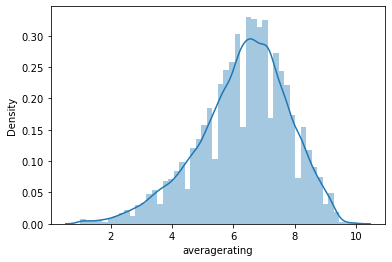

In [96]:
sns.distplot(imdb_title_ratings_csv_gz['averagerating'])

<AxesSubplot:xlabel='domestic_gross', ylabel='Density'>

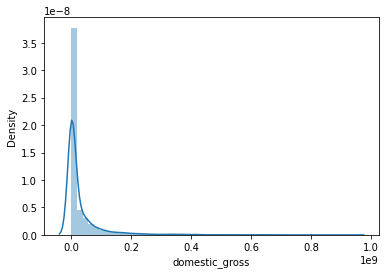

In [97]:
sns.distplot(bom_movie_gross_csv_gz['domestic_gross'])

<AxesSubplot:xlabel='domestic_gross'>

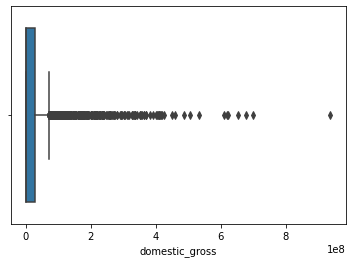

In [98]:
sns.boxplot(x=bom_movie_gross_csv_gz['domestic_gross'])

#### Merge Datasets to connect the information

In [99]:
df_basic_gross = pd.merge(bom_movie_gross_csv_gz,imdb_title_basics_csv_gz,
                    how='inner', left_on='title', right_on='primary_title')
df_basic_gross

,title,studio,domestic_gross,year,tconst,primary_title,original_title,start_year,genres
0,Toy Story 3,BV,415000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,2010,tt1375666,Inception,Inception,2010,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
3296,Souvenir,Strand,11400.0,2018,tt2389092,Souvenir,Souvenir,2014,"Comedy,Romance"
3297,Souvenir,Strand,11400.0,2018,tt3478898,Souvenir,Souvenir,2014,Documentary
3298,Beauty and the Dogs,Osci.,8900.0,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,"Crime,Drama,Thriller"
3299,The Quake,Magn.,6200.0,2018,tt6523720,The Quake,Skjelvet,2018,"Action,Drama,Thriller"


In [100]:
df_basic_rating= pd.merge(imdb_title_basics_csv_gz,imdb_title_ratings_csv_gz,
                          how='inner', left_on='tconst',right_on='tconst')
df_basic_rating

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,Documentary,6.2,5
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,Documentary,6.2,6
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73050,tt9914642,Albatross,Albatross,2017,Documentary,8.5,8


## Data Analysis

#### In this sections, we analyze what types of movies are the top movies in the following categories:
* Quantity of the movies
* Movie Ratings
* Box office gross revenue

We visuzlize the data and the findings

### Count and Visualzie quantity of movies

In [101]:
gen_split=imdb_title_basics_csv_gz['genres'].str.get_dummies(sep=',').sum()
gen_split

Action         10335
Adult             25
Adventure       6464
Animation       2799
Biography       8722
Comedy         25312
Crime           6753
Documentary    51640
Drama          49883
Family          6227
Fantasy         3516
Game-Show          4
History         6225
Horror         10805
Music           4314
Musical         1430
Mystery         4659
News            1551
Reality-TV        98
Romance         9371
Sci-Fi          3365
Short             11
Sport           2234
Talk-Show         50
Thriller       11883
War             1405
Western          467
dtype: int64

Text(0.5, 1.0, 'Movie Quantity')

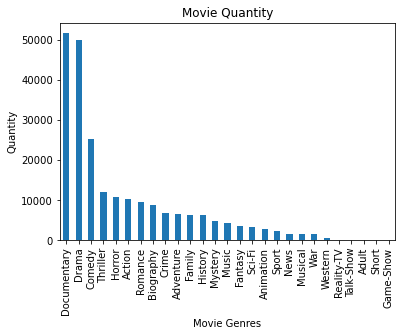

In [124]:
fig, ax = plt.subplots()
gen_split.sort_values(ascending=False).plot.bar()

ax.set_xlabel('Movie Genres')
ax.set_ylabel('Quantity')
ax.set_title('Movie Quantity')

#### Top 3 types of movies : Documentary, Drama, Comedy

### Analyze Movie Ratings

In [103]:
df_basic_rating.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119


In [104]:
movie_types=df_basic_rating['genres'].str.get_dummies(sep=',').columns

In [105]:
d={}
for movie in movie_types:
    d[movie]=[0, 0]

In [106]:
for i in range(len(df_basic_rating)):
    movie_lst=df_basic_rating.loc[i]['genres'].split(',')
    rating = df_basic_rating.loc[i]['averagerating']
    count = df_basic_rating.loc[i]['numvotes']
    
    for movie in movie_lst:
        d[movie][0] += rating*count
        d[movie][1] += count 

In [107]:
d_rating={movie:round(values[0]/values[1],4) for movie, values in d.items()}

In [108]:
d_rating1={'Type':d_rating.keys(), 'Rating':d_rating.values()}

df_rating=pd.DataFrame(data=d_rating1)
df_rating

,Type,Rating
0,Action,6.8874
1,Adult,2.4293
2,Adventure,7.0549
3,Animation,7.2648
4,Biography,7.4748
5,Comedy,6.7232
6,Crime,6.8720
7,Documentary,7.2984
8,Drama,7.0663
9,Family,6.7400


#### Visuzlize Movie Ratings 

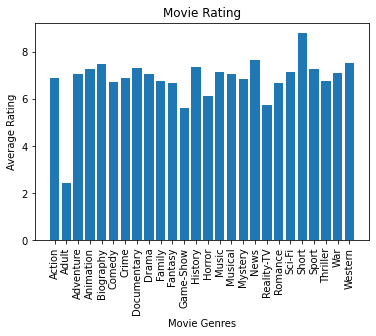

In [109]:
fig, ax = plt.subplots()
ax.bar(df_rating.Type, df_rating.Rating)
ax.set_xlabel('Movie Genres')
ax.set_ylabel('Average Rating')
ax.set_title('Movie Rating')
ax.tick_params(axis="x", labelrotation=90)

#### Top 3 Movie Rating: 
    "Short" : 8.92
    "News"  : 7.64
    "Western: 7.51

### Analyze Movie box office gross

In [110]:
df_basic_gross.head()

,title,studio,domestic_gross,year,tconst,primary_title,original_title,start_year,genres
0,Toy Story 3,BV,415000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,2010,tt1375666,Inception,Inception,2010,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,"Action,Adventure,Sci-Fi"


In [111]:
movie_types=df_basic_rating['genres'].str.get_dummies(sep=',').columns

In [112]:
movie_types

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [113]:
d_gross={}
for movie in movie_types:
    d_gross[movie]=[0, 0]

In [114]:
for i in range(len(df_basic_gross)):
    movie_lst=df_basic_gross.loc[i]['genres'].split(',')
    gross = df_basic_gross.loc[i]['domestic_gross']
    
    for movie in movie_lst:
        d_gross[movie][0] += gross
        d_gross[movie][1] += 1 

In [115]:
d_gross_df={movie:round(values[0]/values[1],2) for movie, values 
                 in d_gross.items() if values[1]!=0}

In [116]:
d_gross_df1={'Type':d_gross_df.keys(), 'Domestic_Gross':d_gross_df.values()}

df_gross=pd.DataFrame(data=d_gross_df1)
df_gross

,Type,Domestic_Gross
0,Action,5.841816e+07
1,Adventure,9.440941e+07
2,Animation,8.732619e+07
3,Biography,2.098164e+07
4,Comedy,3.378180e+07
5,Crime,2.422938e+07
6,Documentary,1.649487e+07
7,Drama,1.666751e+07
8,Family,4.372936e+07
9,Fantasy,5.277712e+07


#### Visualize Movie Box Office

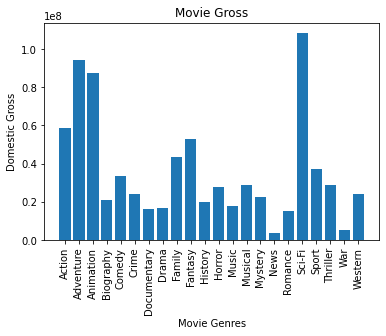

In [117]:
fig, ax = plt.subplots()
ax.bar(df_gross.Type, df_gross.Domestic_Gross)
ax.set_xlabel('Movie Genres')
ax.set_ylabel('Domestic Gross')
ax.set_title('Movie Gross')
ax.tick_params(axis="x", labelrotation=90)

#### Top 3 Movie Gross Box Office: 
    "Sci-Fi"     :   1.083885e+08
    "Adventure"  :   9.440941e+07
    "Animation   :   8.732619e+07

## Recommendations

#### 3 Recommendations on the the types of movies contents to create:

In terms of quantity, movie rating, movie gross:

* Documentary, Drama, Comedy
* Short, News, Western    
* Sci-Fi, Adventure, Animation

## Conclusions


The Project has performed analysis on movie datasets. 
Business insights and recommendations provide direct guidance to the Microsoft movie studio stakeholder as for what types of movies to create. 

Further analysis would generate more insights